Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = "NONE"

REFS: 
- Boudreau, Applied Computational Physics
- Heath, Scientific Computing
- Landau y Paez, Computational physics, problem solving with computers
- Anagnostoupulos, A practical introduction to computational physics and scientific computing
- Ward, Numerical Mathematicas and Computing

# Markov-chain Monte Carlo simulations
The [Monte Carlo simulation method](https://en.wikipedia.org/wiki/Monte_Carlo_method) uses random sampling to perform computational experiments. One , very famous example, is the [Ising model (1920)](https://en.wikipedia.org/wiki/Ising_model), used to model magnetic materials (among many other applications). Here, each site on a discrete grid has a magnetic moment (or any other quantity) whose orientation (up/down, left/right, or angle) represents that site state, and there is an interaction with close neighbors (In 1D, neighbors left and right, in 2D, left/right/up/down). The interaction model can represent how the system respond to temperature and external magnetic field, or to external information pressure (for social systems) and so on. Here we will focus on the thermal 2D model that presents a phase transition. First, we will need to define some key concepts. The Ising model represents a system in the canonical ensemble (fixed temperature, number of particles and volume), where the samples are distributed according to a very specific distribution which you need to sample efficiently. To do so, you use a Markov-Chain and the Metropolis-Hastings algorithm.  The random process allows to simulate the intrinsic fluctuations when a system is in contact with a heat bath. 

## Markov chain
A [Markov chain](https://en.wikipedia.org/wiki/Markov_chain) is a sequence of states that are  produced by a stochastic process where the next state, $\hat X_{i+1}$ depends only on the current one, $\hat X_i$. **There is no memory**. The transition between this two states can be represented by the transition probability $p_{ij}$, which are the elements of and $M\times M$ matrix ($M$ the number of states). They fulfill $\sum_j p_{ij} = 1$. Here the transition matrix is independent on time.  Given two states, the *transition matrix*, $P_{ij}$ can be used to represent as,
\begin{equation}
\hat X_{j} = P \hat X_i.
\end{equation}
Using a super-script as denoting the iteration or algorithmic time, one has
\begin{equation}
\hat X^N = P \hat X^{N-1} = P^N \hat X^{0}.
\end{equation}
Under certain conditions, there is a final state independent on the initial condition (a fixed point), which sometimes is called as the ergodic property, 
\begin{equation}
\vec w = \lim_{N\to\infty} P^N \hat X^0.
\end{equation}
One way to ensure this is the so-called detailed balance condition
\begin{equation}
p_{ij} w_i = p_{ji} w_j.
\end{equation}
Summing over $j$ demonstrates that $\vec w$ is, indeed, a fixed point. By equating the fixed point with the desired distribution, by arranging the transition probabilities,  we complete the Markov chain procedure.

If the actual probability to find the system in state $\mu$  depends on time and is given by $w_\mu(t)$, its time evolution is given by the *master equation*

\begin{equation}
\frac{dw_\mu(t)}{dt} = \sum_\nu {w_\nu(t) R(\nu\to\mu) - w_\mu R(\mu\to\nu)},
\end{equation}

where $R(\mu\to\nu)$ is the transition probability, and $\sum_\mu w_\mu(t)= 1$. After a long time the system reaches a steady state  and $w_\mu(t)$ converge to finite numbers $p_\mu \le 0$. In that case one has 

\begin{equation}
0 = \sum_\nu {w_\nu(t) R(\nu\to\mu) - w_\mu R(\mu\to\nu)},
\end{equation}

and the detailed balance condition is a sufficient (but not necessary) condition to fulfill this.


<mark>Exercises</mark>
- [ ] (Boudreau, 7.8.16) Consider the following transition matrix
    \begin{equation}
    P = \begin{pmatrix}
    3/4 & 1/4 & 0\\
    0 & 2/3 & 1/3\\
    1/4 & 1/4 & 1/2
    \end{pmatrix}
    \end{equation}
    Find:
    + The eigen values and vectors
    + The left and right eigen vectors and values
    + The left and right fixed point probability vector, $\vec w$
    + $\lim_\limits{n\to \infty} P^n$. Is the fixed point independent of the starting vector?

## The Metropolis-Hastings algorithm
The algorithm (Metropolis(1953) and Hastings(1970)) design appropriate transition probabilities to obtain a desired final $\rho(\hat X)$. A new state, $\hat X' $ is generated from an old state, $\hat X$, according to a proposal distribution , $R(\hat X \to \hat X')$, which depends on the actual problem and the programmer (what random variates and distribution). It has the following steps per iteration:
- generate a next state in the Markov chain according to $R(\hat X \to \hat X')$. 
- Accept the new state with probability

  \begin{equation}
  \min \left(1, \frac{R(\hat X' \to \hat X)\rho(\hat X')}{R(\hat X \to \hat X')\rho(\hat X)} \right)
  \end{equation}

If the proposal distribution is reversible (like a Gaussian with fixed width), then the acceptance probability is 

\begin{equation}
\min \left(1, \frac{\rho(\hat X')}{\rho(\hat X)} \right).
\end{equation}

This is called the Metropolis method.   

Some possible problems to take into account:
- *Slow mixing*: not efficient exploration of isolated states.
- *Thermalization*: The simulation must run for a large time before reaching some kind of steady state. This depends, for instance, on temperature.
- *Autocorrelation*: Successive samples are correlated, so you need to generate a given number of samples before taking one into account if your ensemble. 
- *Multimodality* (many maxima/minima): To explore one region the system must pass on a low probability region. 

### Connections with quantum mechanics
- Schroedinger equation in imaginary time: Diffusion advection equation
- Feynman path integral

### Other sampling techniques
- Cluster algorithms
- Guided random walks
- Microcanonical updating

<mark> Exercises </mark>
- [ ] (Boudreau, 7.8.2) A gas is in thermal equilibrium at a temperature $T$, so its velocity distribution is 

  \begin{equation}
  p(v) dv = \left( \frac{m}{2\pi \tau} \right)^{3/2} 4\pi v^2 e^{-mv^2/2\tau} dv,
  \end{equation}
  Non-dimensionalize this equation to show that this (Boltzmann) distribution can be sampled from the gamma distribution. Do it using scipy. Repeat this generation but using Markov chain Monte Carlo.  

# Statistical mechanics
In the canonical ensemble the probability to sample a state $\mu$, with energy $E_\mu$, at temperature $T$, is given by 

\begin{equation}
p_\mu = \frac{1}{Z} e^{-\beta E_\mu},
\end{equation}

where $\beta = 1/kT$ and $Z = \sum_\mu e^{-\beta E_\mu}$ is called the partition function. Is not simply a normalization factor, it stores the information of the system. For instance, to compute an observable average $\langle O \rangle$, one has

\begin{equation}
\langle O \rangle = \sum_\mu p_\mu O_\mu.
\end{equation}

When we sample with the actual system distribution, as in the Metropolis-Hastings method, it is called **importance sampling** and the average value for a given observable is simply

\begin{equation}
\langle O \rangle = \frac{1}{N} \sum O_i,
\end{equation}
where the samples must be independent (not correlated).

For the mean energy, one has

\begin{equation}
\langle E \rangle = \sum_\mu p_\mu O_\mu = \sum_\mu \frac{1}{Z} e^{-\beta E_\mu} = -\frac{\partial \ln Z}{\partial \beta}
\end{equation}

The specific heat can be computed as 

\begin{equation}
C = \frac{\partial U}{\partial T} = k\beta^2 \frac{\partial^2 \ln Z}{\partial \beta^2} =  k\beta^2 (\Delta E) ^2.
\end{equation}

The entropy can be shown to be

\begin{equation}
S = -k\sum_\mu p_\mu \ln p_\mu
\end{equation}



# Ising model
In the [Ising model](https://www.intechopen.com/chapters/71210), each site on a grid is assigned a given state, up or down
<img src="https://qph.cf2.quoracdn.net/main-qimg-0fb41bd632ba1eea8a654828dcff5d93-pjlq">

The state of cell $i$ will be denote as $\sigma_i = \pm 1$. The interaction with the neighbors are represented by the Hamiltonian 

\begin{equation}
H = -J \sum \sigma_i \sigma_{j} - B\sum\sigma_i,
\end{equation}

where $J$ is the coupling constant and the sum is over all $i$ sites and $j$ are all the neighbors of that site, and $B$ is the strength of an external magnetic field. If $J>0$ then the system is ferromagnetic (favors equally oriented spins). The difficulty of modelling a simtem like this is that a simple $5\times 5$ system, the partition function would need to be summed up on $2^25 \simeq 3.4\times 10^6$ terms.

Other observables of interest on the Ising model are
- The magnetization:
  \begin{equation}
  M = \left|\sum \sigma_i \right|.
  \end{equation}
- The susceptibility:
  \begin{equation}
  \chi = \beta (\Delta M)^2.
  \end{equation}


We would like to simulate the Ising system to reproduce an interesting phenomena: a phase transition. For $B=0$, the system will be magnetized (or not) and the behaviour will be clearly determined for a critical temperature 

\begin{equation}
\beta_c = \frac{1}{2}\ln(1+\sqrt{2}) \simeq = 0.4406867935\ldots
\end{equation}

<!-- <img src="https://farside.ph.utexas.edu/teaching/329/lectures/img1313.png">
Reproduced from 
https://farside.ph.utexas.edu/teaching/329/lectures/node110.html
 -->
<img src="https://miro.medium.com/max/1400/1*ODPEcoAf3Rwfyyo7lTsNFw.png">
From: https://towardsdatascience.com/monte-carlo-method-applied-on-a-2d-binary-alloy-using-an-ising-model-on-python-70afa03b172b

Check the following:
- https://www.ibiblio.org/e-notes/Perc/ising.htm
- http://www.bdhammel.com/ising-model/
- https://www.ippp.dur.ac.uk/~krauss/Lectures/NumericalMethods/PhaseTransitions/Lecture/pt1.html
- https://rajeshrinet.github.io/blog/2014/ising-model/


## Ising model and metropolis-Hastings
Since the system is in the canonical ensemble (fixed temperature) it should be sampled from 

\begin{equation}
p(X) = \frac{e^{-\beta H(X)}}{Z},
\end{equation}

where $\beta = 1/k T$ is the Boltzmann factor and $Z$ is the partition function, $Z = \sum e^{-\beta H(x)}$. Given that the Hamiltonian is local, applying the Metropolis algorithm to this canonical probability simplifies to computing just the change with interacting neighbors. In this our method to generate new states could be chosing (at random) a given site and them flipping its state: This implies that $R(\hat X \to \hat X')$ is reversible, and then also 

\begin{equation}
\min \left(1, \frac{\rho(\hat X')}{\rho(\hat X)} \right) = \min \left(1, e^{-\beta(H(x') - H(x))} \right) = \min \left(1, e^{-\beta(E' - E)} \right) = \min \left(1, e^{-\beta \Delta E} \right).
\end{equation}

Therefore, you generate a new sample, if the energy is less than the previous one, the new sample is accepted. Otherwise, a random number $z \in [0, 1) $ is thrown and the new sample is accepted if $z < e^{-\beta \Delta E}$. $\Delta E$ can be easily computed for a 2D system: If a site $i$ is selected and flipped, and its original value is $\sigma_i$, then $\Delta E = E' - E = 2J\sigma_i \sum_j \sigma_j$, where the sum is performed over the neighbors.

## The simulation
We will use a periodic lattice of size $N\times N$ (Toroidal geometry). We will need  functions for
- Setting up the initial state
  + Input: The lattice 
  + Output: The lattice with some initial condition
- Perform a montecarlo step:
  + Input: The lattice, the J constant value, a random number generator already seeded
  + Output: The lattice with the corresponding change. 
- Plot/visualize the system: 
  + Input: The lattice
  + Output: A graphical representation
- Observables: compute the energy, magnetization, specific heat, etc. 
  + Input: The lattice
  + Output: The observables values at that realization
- Perform the simulation: Iterate over time, performing many MonteCarlo steps. Also accumulates the observables 

Based on : https://rajeshrinet.github.io/blog/2014/ising-model/ and https://towardsdatascience.com/monte-carlo-method-applied-on-a-2d-binary-alloy-using-an-ising-model-on-python-70afa03b172b

In [5]:
# Import cell
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [12]:
# functions before the main application

#Setting up the intial state
def initial_state(rng, n):
    """
    Generates a random spin configuration
    """
    return rng.integers(0, 2, size=((n,n))) - 1


def mc_single_step(rng, grid, beta):
    """
    Monte Carlo move using the metropolis algorithm
    """
    # YOUR CODE HERE
    raise NotImplementedError()
        

def mc_full_step(rng, grid, beta):
    """
    Perform a full (on average on every site) monte carlo step
    """
    n = grid.shape[0]
    n2 = n*n
    for istep in range(0, n2):
        mc_single_step(rng, grid, beta)

@njit
def compute_energy(grid):
    """
    Energy for this configuration
    """
    # YOUR CODE HERE
    raise NotImplementedError()

@njit
def compute_magnetization(grid):
    # YOUR CODE HERE
    raise NotImplementedError()
    

In [ ]:
# Constants
N = 15 # grid size
NTEMP = 20 # Number of temperature points
TEMP = np.linspace(1.53, 3.28, NTEMP)
BETA = 1.0/TEMP
NEQ = 300 # Equilibration steps (full sweep)
NSAMPLE = 1000 # Samples to take

NCOLS = 5
NROWS = int(NTEMP/NCOLS)

# Observables
E, M, C, X = np.zeros(NTEMP), np.zeros(NTEMP), np.zeros(NTEMP), np.zeros(NTEMP)

In [ ]:
n = grid.shape[0]
# Select a random site
ii = rng.integers(0, n)
jj = rng.integers(0, n)
# Compute the energy change
DeltaE = 2*grid[ii, jj]*(grid[(ii+1)%n, jj] + grid[(ii-1+n)%n, jj] + 
                             grid[ii, (jj+1)%n] + grid[ii, (jj-1+n)%n])
# Select or reject
if DeltaE < 0:
    grid[ii, jj] *= -1
elif rng.random() < np.exp(-beta*DeltaE):
    grid[ii, jj] *= -1

In [ ]:
n = grid.shape[0]
    energy = 0.0
    for ii in range(n):
        for jj in range(n):
            neigh_sum = grid[(ii+1)%n, jj] + grid[(ii-1+n)%n, jj] + grid[ii, (jj+1)%n] + grid[ii, (jj-1+n)%n]
            energy -= grid[ii, jj]*neigh_sum
    return energy/2.0

In [6]:
fig, ax = plt.subplots(NROWS, NCOLS, sharex = True, sharey = True)

for itemp in range(NTEMP):
    SEED = 42 # can be itemp or whatever
    rng = np.random.default_rng(seed=SEED)
    e1 = m1 = e2 = m2 = 0.0
    
    # create the grid
    grid = initial_state(rng, N)

    # equilibration/thermalization
    for ieq in range(NEQ):
        mc_full_step(rng, grid, BETA[itemp])

    # Sampling (what about correlation?)
    for isample in range(NSAMPLE):
        mc_full_step(rng, grid, BETA[itemp])
        energy = compute_energy(grid)
        magnetization = compute_magnetization(grid)
        e1 += energy
        e2 += energy*energy
        m1 += magnetization
        m2 += magnetization*magnetization
    ax[itemp//NCOLS, itemp%NCOLS].imshow(grid)
    ax[itemp//NCOLS, itemp%NCOLS].set_title(rf"$T = {TEMP[itemp]:.2f}$")

    # Compute averages and also normalize by size
    n1 = 1.0/(NSAMPLE*N*N)
    n2 = n1/NSAMPLE
    E[itemp] = e1*n1
    M[itemp] = m1*n1
    C[itemp] = (n1*e2 - n2*e1*e1)*BETA[itemp]*BETA[itemp]
    X[itemp] = (n1*m2 - n2*m1*m1)*BETA[itemp]
plt.tight_layout()

NameError: ignored

In [ ]:
# Plot the observables
# Critical temp: 2.269
fig, ax = plt.subplots(2,2, sharex = True)
ax[0, 0].plot(TEMP, E, '-o')
ax[0, 0].set_title("Energy")
ax[0, 1].plot(TEMP, M, '-o')
ax[0, 1].set_title("Magnetization")
ax[1, 0].plot(TEMP, C, '-o')
ax[1, 0].set_title("Specific heat")
ax[1, 1].plot(TEMP, X, '-o')
ax[1, 1].set_title("Susceptibility")


NameError: ignored

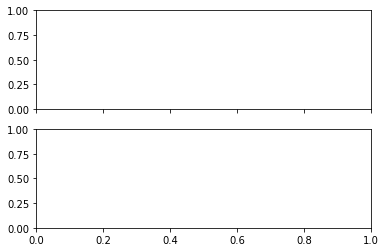

In [7]:
N = 10 # grid size
TEMP = 1.53
BETA = 1.0/TEMP
NSTEPS = N*N*100
SEEDS = np.array([1, 2, 3])



# Observables
fig, ax = plt.subplots(2, 1, sharex = True)
for iseed in range(len(SEEDS)):
    #print(f"T={TEMP[itemp]:.2f}", end=' ')
    SEED = SEEDS[iseed] # can be itemp or whatever
    rng = np.random.default_rng(seed=SEED)



# create the grid
grid = initial_state(rng, N)



E = np.zeros(NSTEPS)
M = np.zeros(NSTEPS)    
for istep in range(NSTEPS):
    mc_single_step(rng, grid, BETA)
    energy = compute_energy(grid)
    magnetization = compute_magnetization(grid)
    E[istep] = energy/(N*N)
    M[istep] = magnetization/(N*N)
    
# Plot the observables
ax[0].plot(np.arange(NSTEPS)/(N*N), E, '-o', label=f"SEED={SEED}")
ax[0].set_title("Energy")
ax[1].plot(np.arange(NSTEPS)/(N*N), M, '-o', label=f"SEED={SEED}")
ax[1].set_title("Magnetization")
ax[0].legend()
ax[1].legend()

In [13]:
N = 10 # grid size
NTEMP = 20 # Number of temperature points
TEMP = np.linspace(1.53, 3.58, NTEMP)
BETA = 1.0/TEMP
NEQ = 300 # Equilibration steps (full sweep)
NSAMPLE = 1000 # Samples to take



SEEDS = [42, 43, 44, 45, 46, 47, 48]
NSEED = len(SEEDS)



# Observables
E, M, C, X = np.zeros((NTEMP, NSEED)), np.zeros((NTEMP, NSEED)), np.zeros((NTEMP, NSEED)), np.zeros((NTEMP, NSEED))



for itemp in range(NTEMP):
    print(f"T={TEMP[itemp]:.2f} -> ", end='')
    print("SEED: ", end='')
    for iseed, SEED in enumerate(SEEDS):
        print(f"{SEED}", end=' ')
        #SEED = 42 # can be itemp or whatever
        rng = np.random.default_rng(seed=SEED)
        e1 = m1 = e2 = m2 = 0.0



       # create the grid
        grid = initial_state(rng, N)



       # equilibration/thermalization
        for ieq in range(NEQ):
            mc_full_step(rng, grid, BETA[itemp])



       # Sampling (what about correlation?)
        for isample in range(NSAMPLE):
            mc_full_step(rng, grid, BETA[itemp])
            energy = compute_energy(grid)
            magnetization = compute_magnetization(grid)
            e1 += energy
            e2 += energy*energy
            m1 += magnetization
            m2 += magnetization*magnetization



       # Compute averages and also normalize by size
        n1 = 1.0/(NSAMPLE*N*N)
        n2 = n1/NSAMPLE
        E[itemp, iseed] = e1*n1
        M[itemp, iseed] = m1*n1
        C[itemp, iseed] = (n1*e2 - n2*e1*e1)*BETA[itemp]*BETA[itemp]
        X[itemp, iseed] = (n1*m2 - n2*m1*m1)*BETA[itemp]
    print()

T=1.53 -> SEED: 42 

NotImplementedError: ignored

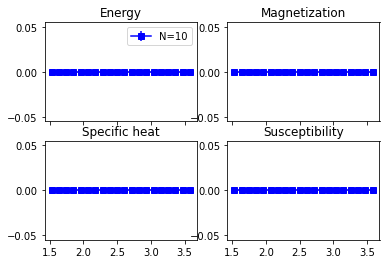

In [10]:
fig, ax = plt.subplots(2, 2, sharex = True)
for ii in range(NSEED):
    ax[0, 0].plot(TEMP, E[:, ii], '-o', alpha=0.2)
ax[0, 0].errorbar(TEMP, E.mean(axis=1), yerr=E.std(axis=1), fmt='b-s',
                  label=f"N={N}")
ax[0, 0].set_title("Energy")
for ii in range(NSEED):
    ax[0, 1].plot(TEMP, M[:, ii], '-o', alpha=0.2)
ax[0, 1].errorbar(TEMP, M.mean(axis=1), yerr=M.std(axis=1), fmt='b-s',
                  label=f"N={N}")
ax[0, 1].set_title("Magnetization")
for ii in range(NSEED):
    ax[1, 0].plot(TEMP, C[:, ii], '-o', alpha=0.2)
ax[1, 0].errorbar(TEMP, C.mean(axis=1), yerr=C.std(axis=1), fmt='b-s',
                  label=f"N={N}")
ax[1, 0].set_title("Specific heat")
for ii in range(NSEED):
    ax[1, 1].plot(TEMP, X[:, ii], '-o', alpha=0.2)
ax[1, 1].errorbar(TEMP, X.mean(axis=1), yerr=X.std(axis=1), fmt='b-s',
                  label=f"N={N}")
ax[1, 1].set_title("Susceptibility")
ax[0,0].legend()

# More topics:
- Percolation
- Fractals
- Scaling and critical exponents
- Universality and renormalization

<mark> Exercises</mark>
- [ ] Plot the observable for several system sizes. Is there any dependence?
- [ ] Plot the energy, magnetization, etc, as functions of time, for several temperatures, including the critical one. What do you observe? 
- [ ] What is the effect of taking more samples? do the results improve?
- [ ] Create an animation of the evolution of the system.
- [ ] There should be a correlation between samples. How will you compute it? or taking samples after a full sweep guarantees something?
- [ ] Compute the same observable but average over several seeds to compute the mean and the error of the mean
- [ ] The statistic over several seeds can be computed in parallel using the multiprocessing module (for example). Implement it. 
- [ ] How does the computation time scales with $n$, for a full simulation?
- [ ] Is there a relationship between the number of samples and the system size?
- [ ] Use vpython to visualize the system and its evolution
- [ ] Investigate the Wang-Landau sampling. Implement it. (FINAL PROJECT) 